# Loan Prediction Problem (Logistic Regression)
* To predict whether a person will get his/her loan approved depending on the given fearures

-------------------------------------------------------------------------------------------------------------------------------
### Columns Include :
* Loan_ID
* Gender
* Married
* Dependents
* Education
* Self_Employed
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History
* Property_Area

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
train=pd.read_csv('train_data.csv')

In [87]:
t=pd.read_csv('train_data.csv')

In [88]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
t=train.copy()

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [91]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [92]:
train.shape

(614, 13)

In [93]:
test=pd.read_csv('test_data.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [95]:
test.shape

(367, 12)

### Visualize empty rows:

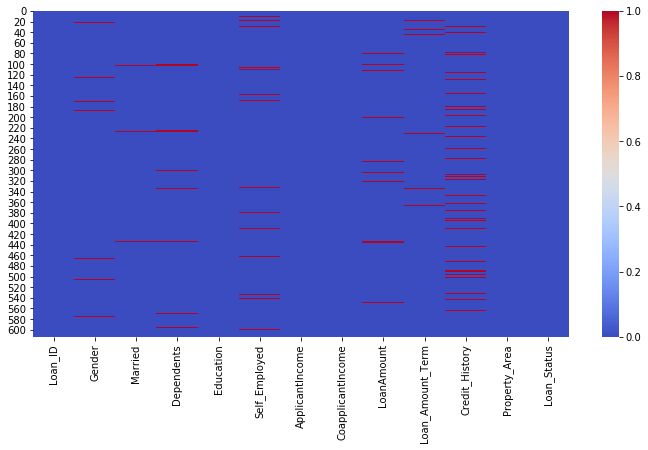

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),cmap='coolwarm')


### Let's visualize some test data:

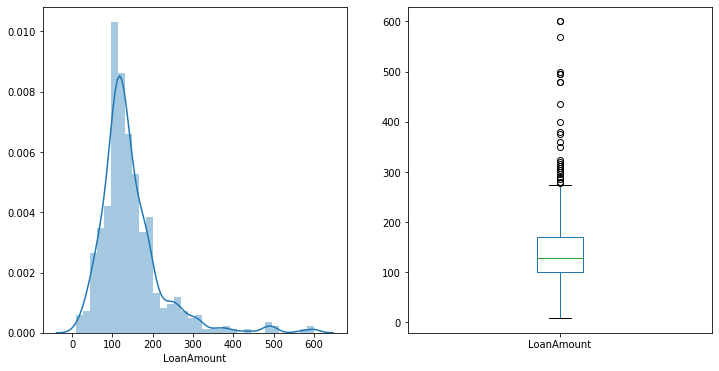

In [97]:
df=train.dropna(axis=0)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])
plt.subplot(1,2,2)
df['LoanAmount'].plot.box()

* Mostly loan amount is in between 100,000  and  180,000 dollars 

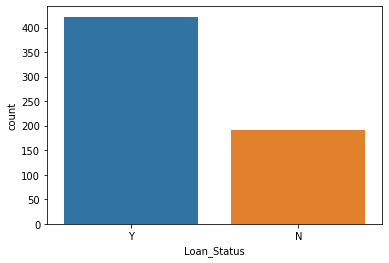

In [98]:
sns.countplot(x='Loan_Status',data=train)

In [99]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

* This shows 68% of the people in our data got their loan approved

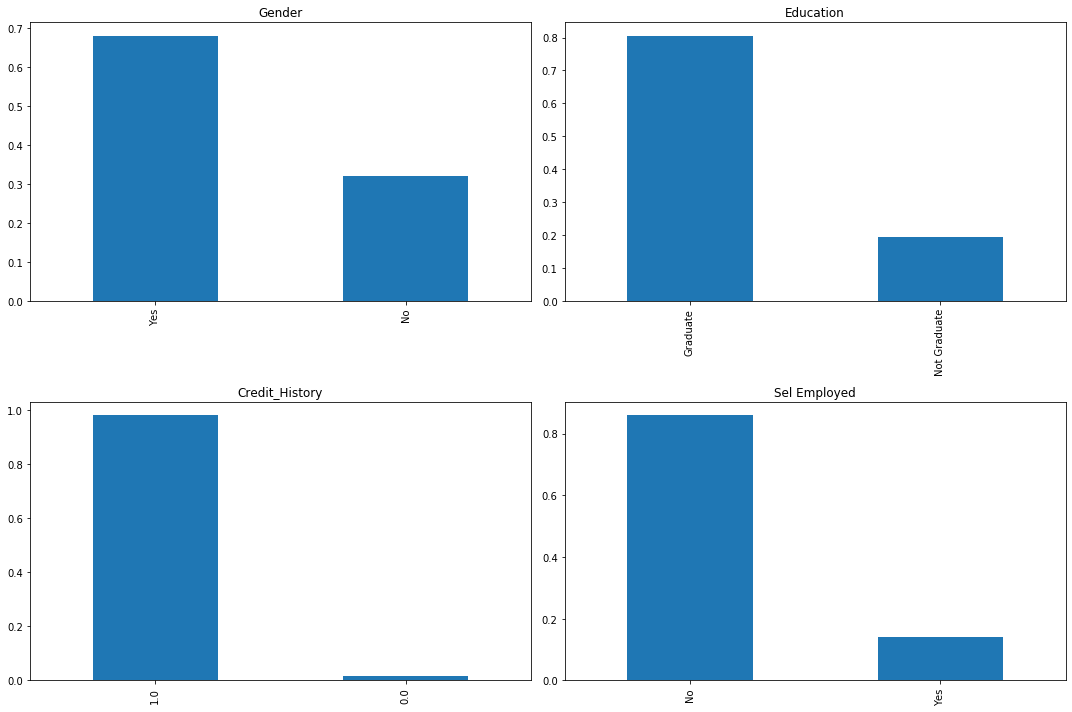

In [100]:
plt.subplot(2,2,1)

train[train['Loan_Status']=='Y']['Married'].value_counts(normalize=True).plot.bar(figsize=(15,10),title= 'Gender')

plt.subplot(2,2,2)
train[train['Loan_Status']=='Y']['Education'].value_counts(normalize=True).plot.bar(figsize=(15,10),title= 'Education')

plt.subplot(2,2,3)
train[train['Loan_Status']=='Y']['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(15,10),title= 'Credit_History')

plt.subplot(2,2,4)
train[train['Loan_Status']=='Y']['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Sel Employed')

plt.tight_layout()

* From the above plots, we can infer that Males with a Gradute Degree and Credit score who are not Self-employed are more likely to get the Loan Approved

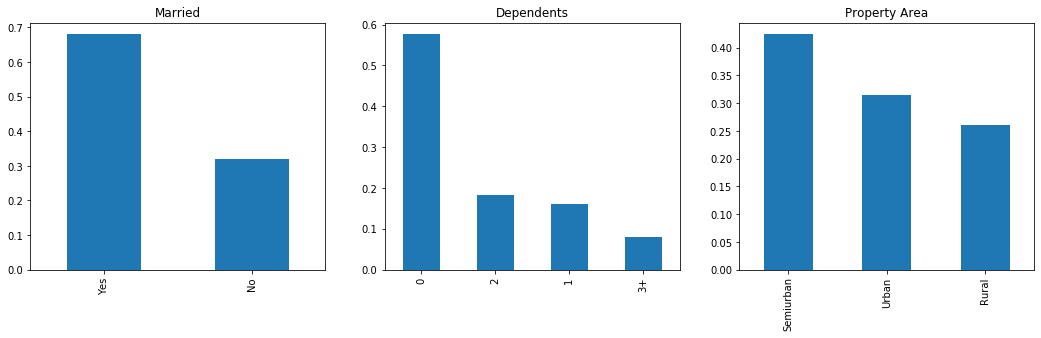

In [101]:
plt.subplot(2,3,1)

train[train['Loan_Status']=='Y']['Married'].value_counts(normalize=True).plot.bar(figsize=(18,10),title= 'Married')

plt.subplot(2,3,2)

train[train['Loan_Status']=='Y']['Dependents'].value_counts(normalize=True).plot.bar(figsize=(18,10),title= 'Dependents')

plt.subplot(2,3,3)

train[train['Loan_Status']=='Y']['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(18,10),title= 'Property Area')


* Here, we can again infer that Married people with less depedents with properties in Urban and Semi-Urban are more likely to get their Loan Approved

Text(0.5, 1.0, 'Applicant Income')

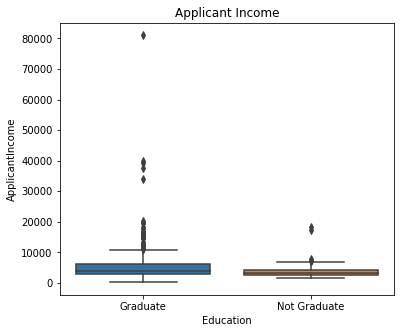

In [102]:
plt.figure(figsize=(6,5))

###train.boxplot(by='Education',column='ApplicantIncome')
###plt.suptitle("")
#train.boxplot(column='ApplicantIncome', by = 'Education')
sns.boxplot(y=df['ApplicantIncome'],data=train,x='Education',orient="v")
plt.title('Applicant Income')

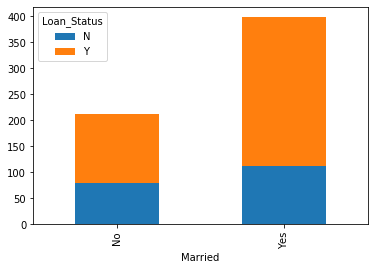

In [103]:
Gender=pd.crosstab(train['Married'],train['Loan_Status'])

Gender.plot(kind='bar',stacked=True)


* Married people tend to get their loan approved

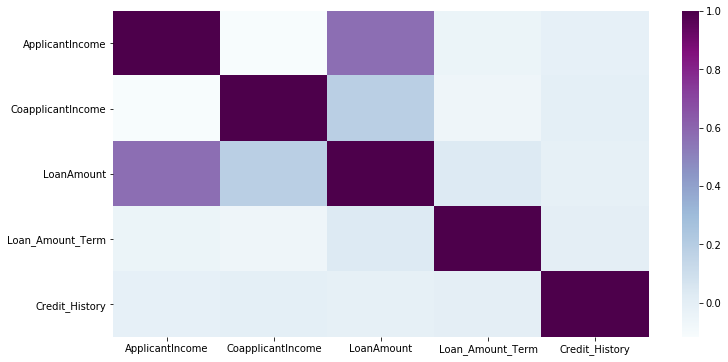

In [104]:
plt.figure(figsize=(12,6))

sns.heatmap(train.corr(),cmap='BuPu')

* We can clearly see that Loan Amount is highly correlated to Applicant and Co-Applicant's Income

#### Filling missing values

In [105]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

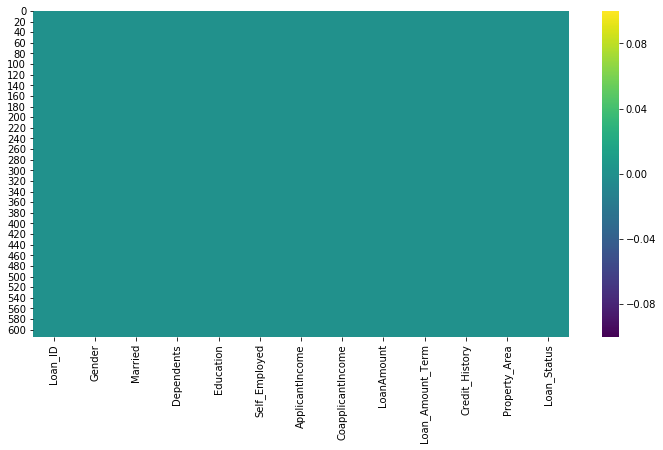

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),cmap='viridis')


In [108]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* Testing and filling null values for the test set

In [109]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [110]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [111]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [112]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

* Splitting in X and y

In [113]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [114]:
X=pd.get_dummies(X,drop_first=True)
y=pd.get_dummies(y,drop_first=True)


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size =0.3)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [119]:
model=LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
y_pred=model.predict(X_test)

In [121]:
accuracy_score(y_test,y_pred)

0.8108108108108109

In [123]:
test=pd.get_dummies(test,drop_first=True)
pred_test=model.predict(test)

### Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [124]:
from sklearn.metrics import classification_report,confusion_matrix

In [125]:
print(confusion_matrix(y_test,y_pred))

[[ 23  32]
 [  3 127]]


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        55
           1       0.80      0.98      0.88       130

    accuracy                           0.81       185
   macro avg       0.84      0.70      0.72       185
weighted avg       0.82      0.81      0.79       185

